In [1]:
import cv2
import dlib

class Landmarks():
  def __init__(self,image):
    self.original_image=image #stores the image for future use
    # load the face detector and shape predictor
    self.detector = dlib.get_frontal_face_detector() #instance of face detection model
    self.predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  #instance of landmark detection model, pretrained model download link: https://www.kaggle.com/datasets/sergiovirahonda/shape-predictor-68-face-landmarksdat
  
  #draws a rectangle without overwriting the original image
  def _draw_rectangle(self,image, coordinates1, coordinates2):
    new_image=image.copy()
    new_image=cv2.rectangle(new_image, coordinates1, coordinates2, (0, 255, 0), 1)   #last two arguments are color of rectangle and thickness
    return new_image

  #draws a circle without overwriting the original image
  def _draw_circle(self,image, x, y):
    new_image=image.copy()
    new_image=cv2.circle(new_image, (x, y), 1, (255, 0, 0),-1)   #last three arguments are radius,color,and thickness (-1 means filled circles)
    return new_image

  #detects faces and returns rectangles of faces (regions of interests)
  def detect_faces(self):
    gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)  #transform image into gray scale
    rectangles = self.detector(gray_image)   # detect the faces (rectangles)
    return rectangles #rectangles coordunates

  #detects landmarks and returns landmarks of faces
  def detect_landmarks(self,rectangles):
    gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)  #transform image into gray scale
    rectangles_landmarks=[]  #list to append landmarks of each face
    for rectangle in rectangles: #iterate on faces
      landmarks = self.predictor(gray_image, rectangle)   # apply the shape predictor to the face ROI
      landmarks_coordinates=[] #list to append coordinates of each rectangle
      for n in range(landmarks.num_parts):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_coordinates.append((x,y))
      rectangles_landmarks.append(landmarks_coordinates)
    return rectangles_landmarks #returns list of lists (each list contains landmarks coordinates of 1 face)

  #draw rectangles on input image
  def apply_rectangles(self,input_image,rectangles):
    detected_faces_image=input_image
    for rectangle in rectangles:
      # extract the coordinates of the bounding box
      x1 = rectangle.left()
      y1 = rectangle.top()
      x2 = rectangle.right()
      y2 = rectangle.bottom()
      detected_faces_image=self._draw_rectangle(detected_faces_image, (x1, y1), (x2, y2)) #last two arguments are color of rectangle and thickness
    return detected_faces_image
  
  #draw landmarks on input image
  def apply_landmarks(self,input_image,rectangles_coordinates):
    detected_landmarks_image=input_image
    for rectangle_coordinates in rectangles_coordinates:
      for x,y in rectangle_coordinates:
        detected_landmarks_image=self._draw_circle(detected_landmarks_image, x, y) #last three arguments are radius,color,and thickness (-1 means filled circles)
    return detected_landmarks_image #landmarks are now drawn on the image


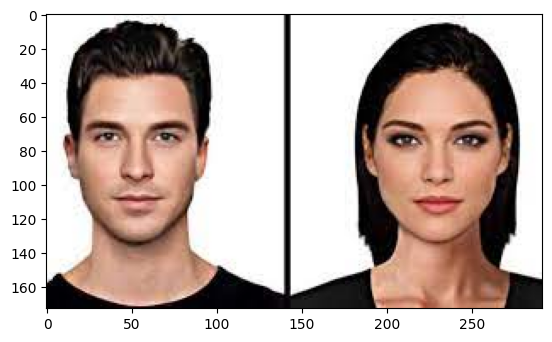

In [2]:
import matplotlib.pyplot as plt
image=cv2.imread("download.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); #for colab replace plt.imshow with cv2_imshow (from google.colab.patches import cv2_imshow) and remove bgr2rgb

In [3]:
model=Landmarks(image)
rectangles=model.detect_faces()
landmarks=model.detect_landmarks(rectangles)


In [4]:
print(rectangles)
print("landmarks")
print(landmarks)

rectangles[[(21, 53) (93, 125)], [(189, 54) (275, 141)]]
landmarks
[[(17, 73), (17, 83), (19, 92), (20, 102), (23, 111), (29, 119), (36, 127), (44, 133), (54, 134), (63, 132), (72, 126), (79, 118), (84, 110), (86, 101), (88, 92), (89, 82), (90, 73), (22, 68), (27, 63), (33, 62), (39, 63), (46, 65), (60, 65), (67, 63), (74, 62), (80, 63), (85, 68), (53, 72), (53, 79), (53, 86), (53, 93), (47, 96), (50, 97), (53, 99), (57, 97), (60, 96), (31, 73), (34, 70), (39, 71), (43, 74), (39, 75), (34, 75), (63, 73), (67, 71), (72, 71), (76, 73), (72, 75), (67, 74), (40, 108), (45, 107), (49, 106), (53, 107), (57, 106), (62, 107), (68, 108), (63, 113), (58, 115), (54, 115), (49, 115), (45, 112), (42, 109), (49, 109), (53, 109), (57, 109), (65, 109), (57, 109), (53, 110), (49, 109)], [(191, 72), (192, 82), (194, 92), (195, 102), (199, 111), (205, 119), (212, 126), (221, 132), (230, 134), (239, 132), (247, 126), (255, 119), (260, 111), (264, 102), (265, 92), (267, 82), (268, 72), (197, 66), (202, 63)

In [5]:
image_with_rectangles=model.apply_rectangles(image,rectangles) 
image_with_landmarks=model.apply_landmarks(image,landmarks)
image_with_both= model.apply_landmarks(image_with_rectangles,landmarks) #draw landmarks on image with rectangles

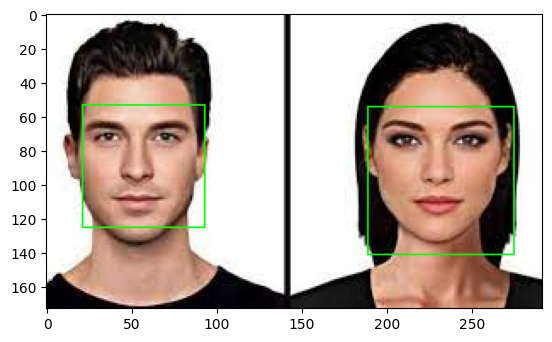

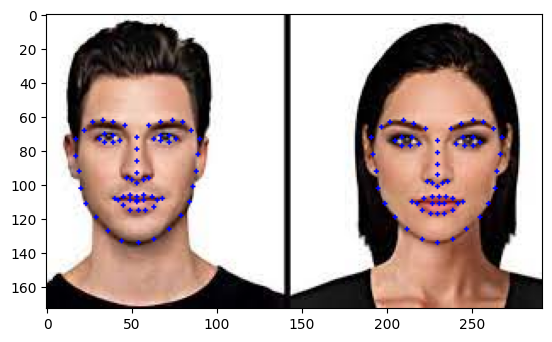

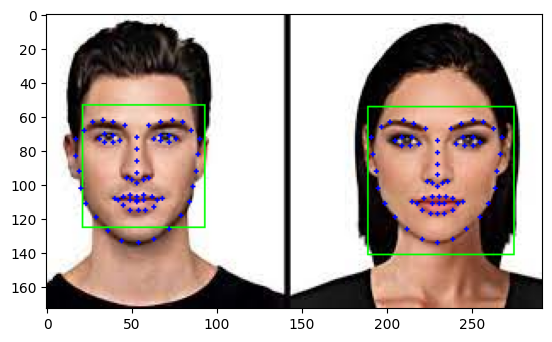

In [6]:
plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB));
plt.show()
plt.imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB));
plt.show()
plt.imshow(cv2.cvtColor(image_with_both, cv2.COLOR_BGR2RGB));
plt.show()
